In [51]:
import numpy as np
from ikpy.chain import Chain
import ikpy.utils.plot as ikpy_plot

import time
import math

import ipywidgets as widgets
import serial

In [52]:
arm_chain = Chain.from_urdf_file("robot.urdf", active_links_mask=[False, True, True, True, True, True, True])

In [53]:
target_position = [0, 0.2, 0.1]

target_orientation = [-1, 0, 0]

In [54]:
# Define link lengths for 6 DoF
a1, a2, a3, a4, a5, a6 = (0.0, 0.0, 0.07, 0.07, 0.07, 0.0)

def dh_transformation_matrix(theta, a,d, alpha):
    cos_theta, cos_alpha = np.cos(theta), np.cos(alpha)
    sine_theta, sine_alpha = np.sin(theta), np.sin(alpha)

    matrix = np.array(
        [
            [cos_theta, -sine_theta*cos_alpha, sine_theta*sine_alpha, a*cos_theta],
            [sine_theta, cos_theta*cos_alpha, -cos_theta*sine_alpha, a*sine_theta],
            [0, sine_alpha, cos_alpha, d],
            [0, 0, 0, 1]
        ]
    )

    return matrix

In [55]:
def forward_kinematics(thetas):
    T1 = dh_transformation_matrix(thetas[0], a1, 0, 90)
    T2 = dh_transformation_matrix(thetas[1], a2, 0, 0)
    T3 = dh_transformation_matrix(thetas[2], a3, 0, 0)
    T4 = dh_transformation_matrix(thetas[3], a4, 0, 90)
    T5 = dh_transformation_matrix(thetas[4], a5, 0, 0)
    T6 = dh_transformation_matrix(thetas[5], a6, 0, -90)

    T_final = T1 @ T2 @ T3 @ T4 @ T5 @ T6
    
    return T_final

In [56]:
# !pip install ikpy

In [57]:
joint_angles = arm_chain.inverse_kinematics(target_position, target_orientation, orientation_mode="Y")

print("Joint angles:", list(map(lambda x: math.degrees(x), joint_angles.tolist())))


Joint angles: [0.0, 0.03749062380785217, 3.0222369320367187e-31, -74.48451336700701, -74.48451336692231, 89.95437379277602, -3.5257547540444555e-19]


In [58]:
computed_position = arm_chain.forward_kinematics(joint_angles)
approx_positions = list(map(lambda x: round(x, 2), computed_position[:3, 3]))
print(f"computed_position: {computed_position[:3, 3]}, actual position: {target_position}")
print(f"approximated computed_position: {approx_positions}")

computed_position: [1.40137659e-04 1.83743012e-01 1.46069561e-01], actual position: [0, 0.2, 0.1]
approximated computed_position: [0.0, 0.18, 0.15]


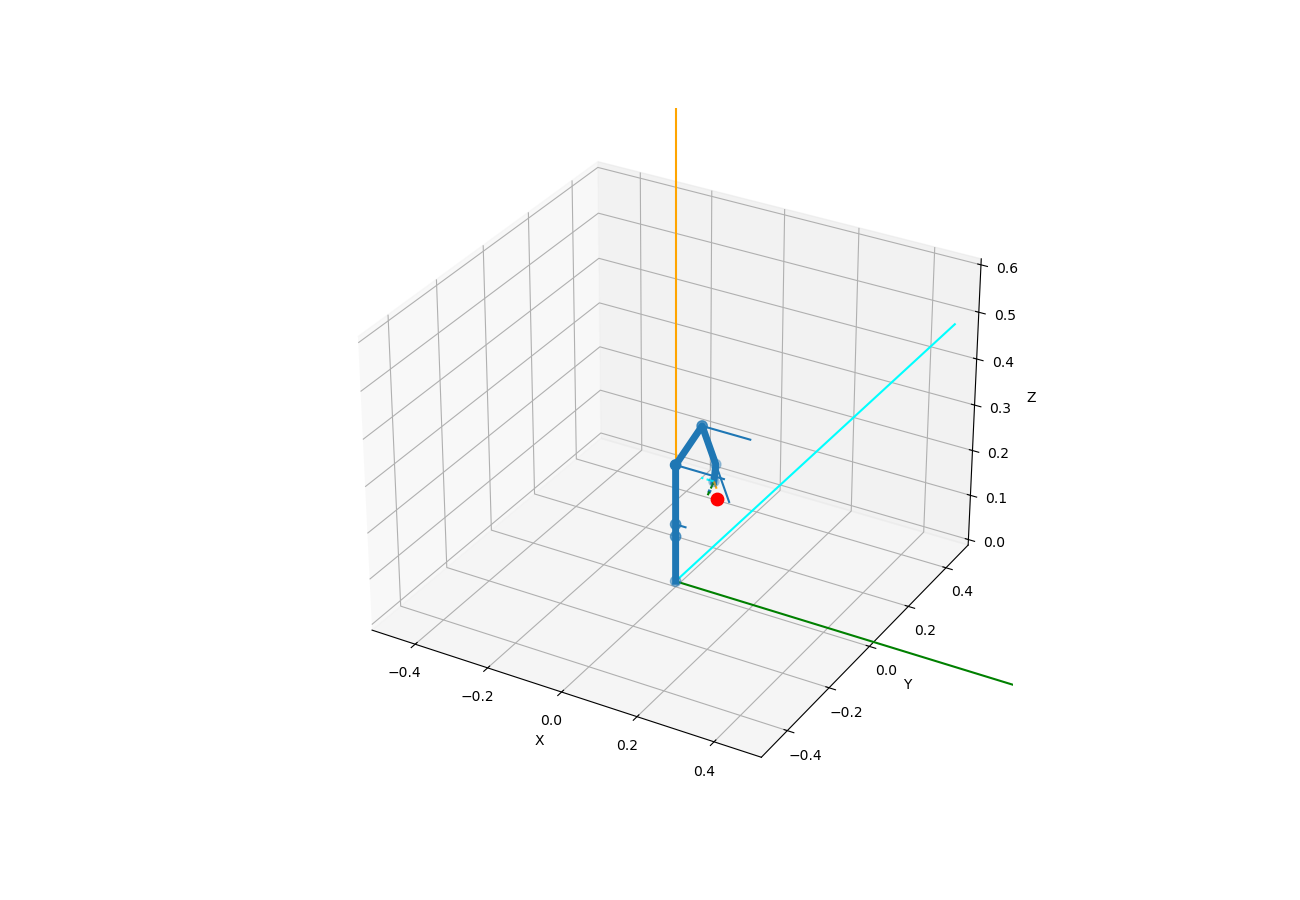

In [59]:
#%matplotlib inline
%matplotlib widget
import matplotlib.pyplot as plt
fig, ax = ikpy_plot.init_3d_figure()
fig.set_figheight(9)  
fig.set_figwidth(13)  
arm_chain.plot(joint_angles, ax, target=target_position)
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)
ax.set_zlim(0, 0.6)
plt.ion()

In [60]:
def doIK():
    global joint_angles
    old_position= joint_angles.copy()
    joint_angles = arm_chain.inverse_kinematics(target_position, target_orientation, orientation_mode="Z", initial_position=old_position)

def updatePlot():
    ax.clear()
    arm_chain.plot(joint_angles, ax, target=target_position)
    plt.xlim(-0.5, 0.5)
    plt.ylim(-0.5, 0.5)
    ax.set_zlim(0, 0.6)
    fig.canvas.draw()
    fig.canvas.flush_events()
    
def move(x,y,z):
    global target_position
    target_position = [x,y,z]
    doIK()
    updatePlot()

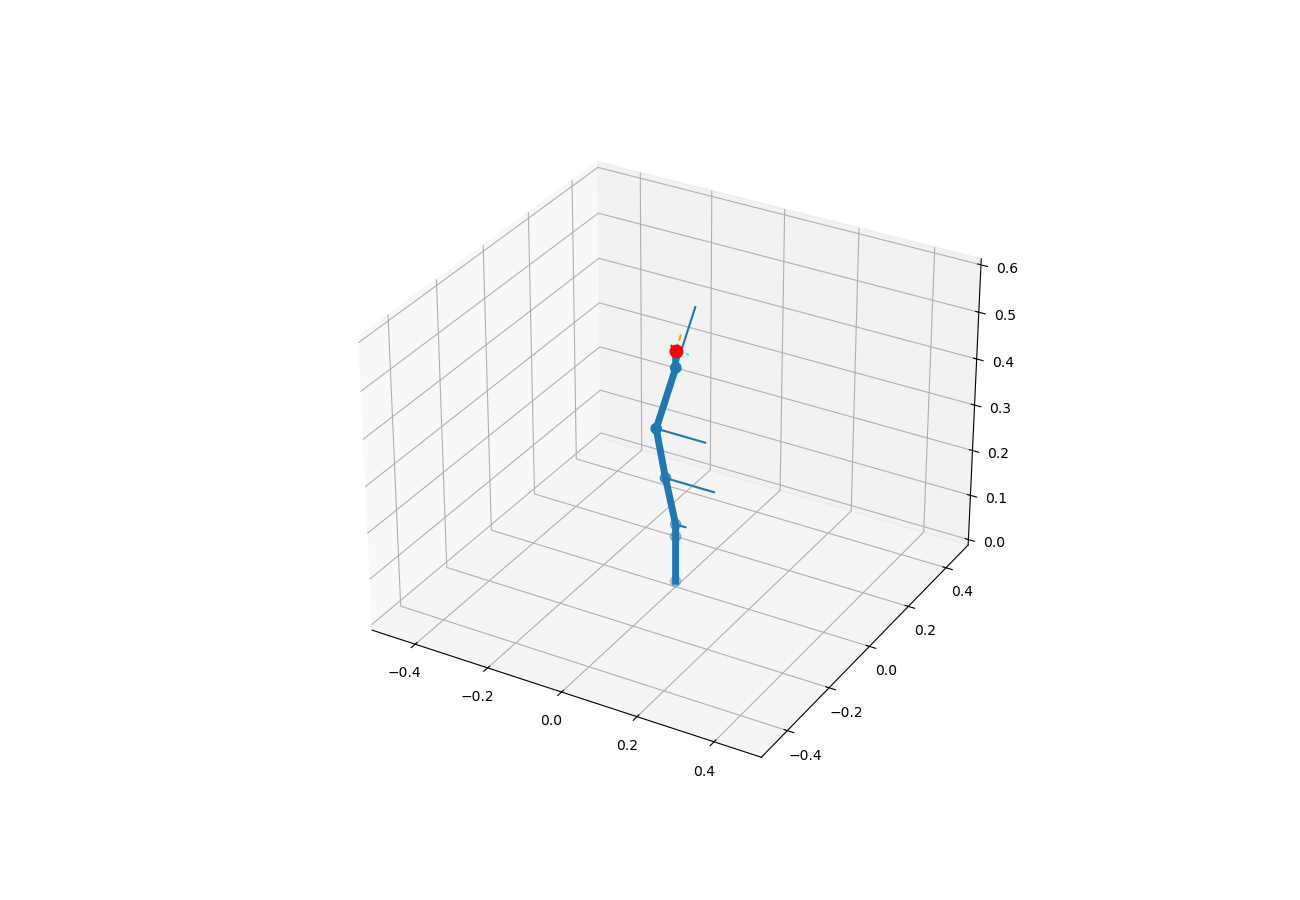

In [91]:
%matplotlib widget
import matplotlib.pyplot as plt
fig, ax = ikpy_plot.init_3d_figure()
fig.set_figheight(9)  
fig.set_figwidth(13)  
arm_chain.plot(joint_angles, ax, target=target_position)
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)
ax.set_zlim(0, 0.6)
plt.ion()
move(0, 0, 0.5)

In [93]:
move(0.1, 0.1, 0.2)

In [95]:
move(0.2, 0.0, 0.3)

In [97]:
move(0.0, -0.1, 0.4)

[0.0, 169.52, 0.17, -34.99, 63.27, 22.0, -1.43]